In [2]:
# 필요한 라이브러리 불러오기
import random
import pandas as pd 
import numpy as np
from numpy import savez_compressed
from numpy import load
from natsort import natsorted
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler ,RobustScaler
from sklearn.model_selection import KFold

from tqdm.notebook import trange, tqdm
from os.path import join

from pickle import dump, load

In [8]:
# IWALQQ_AE_1st 불러오기
dataSetDir = r'../SAVE_dataSet/IWALQQ_AE_1st'
numFold = 0
load_train_IWALLQQ_AE_1st = np.load(join(dataSetDir,f"{numFold}_fold_final_train.npz"))

# IWALQQ_AE_1st 불러오기
dataSetDir = r'../SAVE_dataSet/IWALQQ_1st_correction'
numFold = 0
load_train_IWALQQ_1st_correction = np.load(join(dataSetDir,f"{numFold}_fold_final_train.npz"))


In [11]:
def makeColumns_target():
    SIDEIDX = ['target','nontarget']
    PARTIDX = ['shank','shoe','thigh']
    TYPEIDX = ['ACC','GYRO'] # 여기서는 MAG는 제낌
    AXISIDX = ['X', 'Y', 'Z']
    # 다리용
    LEGCOLUMNSLENGTH = 36 # 이거는 양 다리 데이터 
    COl_imu_legs = [f'{SIDEIDX[int(i//(LEGCOLUMNSLENGTH/2))]}\
_{PARTIDX[(i//(len(TYPEIDX)*len(AXISIDX)))%len(PARTIDX)]}\
_{TYPEIDX[(i//(len(AXISIDX)))%len(TYPEIDX)]}\
_{AXISIDX[i%len(AXISIDX)]}' for i in range(0,LEGCOLUMNSLENGTH)]
    # 트렁크용
    TRKCOLUMNSLENGTH = 6
    Col_imu_trunk = [f'trunk_{TYPEIDX[(i//(len(AXISIDX)))%len(TYPEIDX)]}_{AXISIDX[i%len(AXISIDX)]}' for i in range(0,TRKCOLUMNSLENGTH)]
    # 최종 column
    newColumns = COl_imu_legs+Col_imu_trunk
    return newColumns
# subject로 분류한 것을 다시 전체 데이터 index 기준으로 변경하기
# subject로 Kfold로 된것을 subject fold로 바꿔주는 함수

In [12]:
# P002 데이터 고르기
p002_AE = load_train_IWALLQQ_AE_1st['final_X_train'][0]
p002_correction = load_train_IWALQQ_1st_correction['final_X_train'][0]

# p002_AE 데이터를 p002_correction처럼 바꾸기
# 원래 컬럼 순서 만들기
originCol = makeColumns_target()
# AE 컬럼에 맞게끔 origin 컬럼 변경하기
AEcolumns = [col for col in originCol if 'ACC' in col ] + [col for col in originCol if 'GYRO' in col ]
# 현재 AE 컬럼을 넣은 dataframe 만들기
df_p002_AE = pd.DataFrame(p002_AE, columns=AEcolumns)
# AE 컬럼을 가진 df를 원하는 순서, 즉 originCol로 다시 바꾸기
reord_df_p002_AE = df_p002_AE.reindex(originCol, axis=1)
# 이제 이거를 한줄로 만들기
flt_reord_df_p002_AE = np.array(reord_df_p002_AE).flatten('F').reshape(-1,1)

In [13]:
flt_reord_df_p002_AE.shape

(4242, 1)

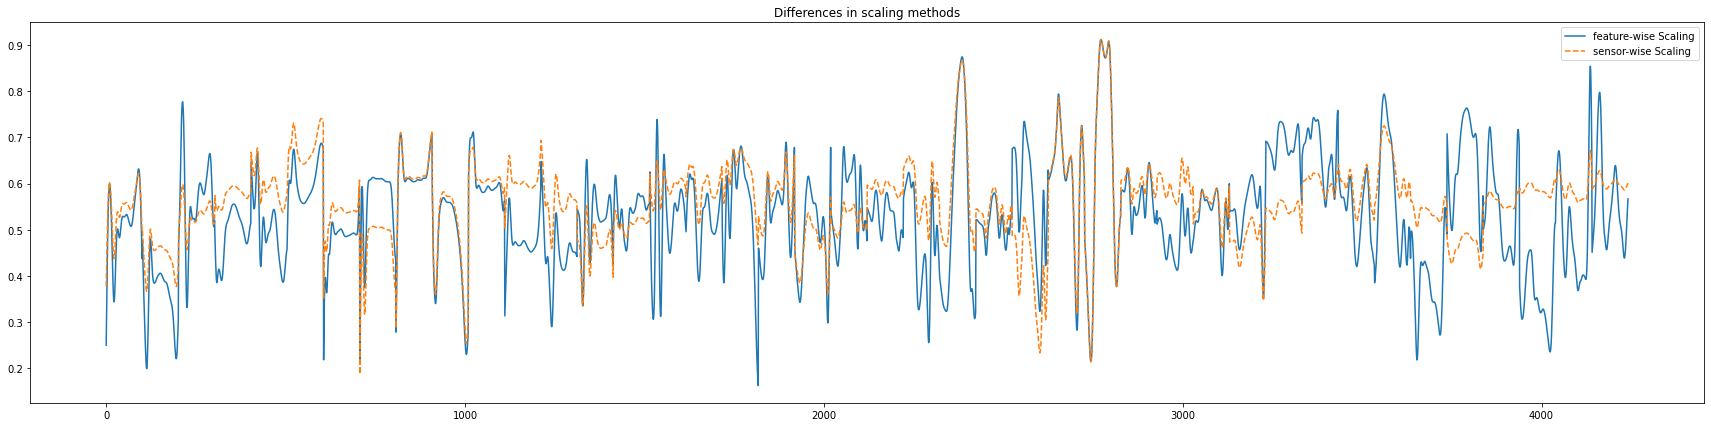

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(figsize=(30, 7))
xpoints = np.array([_ for _ in range(0,len(p002_correction[:]))])
ypoints = np.array(p002_correction[:])
ypoints_2 = np.array(flt_reord_df_p002_AE[:])

plt.plot(xpoints, ypoints,label='feature-wise Scaling')
plt.plot(xpoints, ypoints_2,'--',label="sensor-wise Scaling")
plt.legend()
plt.title("Differences in scaling methods")
plt.show()

# 데이터 변경

In [16]:
# P002 데이터 고르
p002_AE = load_train_IWALLQQ_AE_1st['final_X_train']
p002_correction = load_train_IWALQQ_1st_correction['final_X_train']

In [17]:
p002_AE.shape , p002_correction.shape

((722, 101, 42), (722, 4242, 1))

In [20]:
re_p002_AE = np.reshape(p002_AE, newshape=(-1,p002_AE.shape[1]*p002_AE.shape[2],1), order='F')
print(re_p002_AE.shape)
re_p002_correction = np.reshape(p002_correction, newshape=(-1,p002_correction.shape[1]*p002_correction.shape[2],1), order='F')
print(re_p002_correction.shape)

(722, 4242, 1)
(722, 4242, 1)


(array([[0.24955133],
        [0.30995249],
        [0.3714795 ],
        ...,
        [0.53711308],
        [0.55219708],
        [0.56659678]]),
 array([[0.24955133],
        [0.30995249],
        [0.3714795 ],
        ...,
        [0.53711308],
        [0.55219708],
        [0.56659678]]))

In [121]:
len(re_p002_AE[1])

4242

In [122]:
re_p002_AE[2][:]

array([[0.57725873],
       [0.57107321],
       [0.56397048],
       ...,
       [0.61517855],
       [0.61623766],
       [0.61724418]])

In [123]:
p002_AE[2].shape

(101, 42)

In [124]:
p002_AE[2][:,41]

array([0.59428466, 0.59327559, 0.59210004, 0.5908874 , 0.5896349 ,
       0.58844446, 0.58742259, 0.58669596, 0.58634946, 0.58643551,
       0.58696952, 0.58794129, 0.58929376, 0.59093199, 0.59270676,
       0.59441678, 0.59583614, 0.59677013, 0.59710154, 0.59680536,
       0.59600171, 0.59491737, 0.59384592, 0.59306132, 0.59273457,
       0.59293226, 0.59360601, 0.59463864, 0.5958792 , 0.59717291,
       0.59836109, 0.5992892 , 0.59983517, 0.59993626, 0.59961233,
       0.59895742, 0.59811884, 0.59726923, 0.59655945, 0.59609498,
       0.59591406, 0.5960042 , 0.59632102, 0.59680346, 0.59739289,
       0.59803694, 0.59868743, 0.59929594, 0.59981085, 0.60018446,
       0.60038247, 0.60038087, 0.60017519, 0.59975816, 0.59913046,
       0.59829557, 0.59725737, 0.59603897, 0.59464308, 0.59310221,
       0.59144401, 0.5897246 , 0.58801183, 0.58638551, 0.58496007,
       0.58384156, 0.58312909, 0.5828612 , 0.58302892, 0.58357506,
       0.58438981, 0.58533371, 0.58624788, 0.5870016 , 0.58753

In [97]:
# P002 데이터 고르
p002_AE = load_train_IWALLQQ_AE_1st['final_Y_moBWHT_train']
p002_correction = load_train_IWALQQ_1st_correction['final_Y_moBWHT_train']

In [98]:
# 데이터 안에 뭐들었는지 확인할 때
list(load_train_IWALQQ_1st_correction.keys())

['final_X_train', 'final_Y_angle_train', 'final_Y_moBWHT_train']

In [103]:
p002_AE.shape , p002_correction.shape

((722, 101, 3), (722, 303, 1))

In [115]:
re_p002_AE = np.reshape(p002_AE, newshape=(-1,p002_AE.shape[1]*p002_AE.shape[2],1), order='F')

In [116]:
re_p002_AE.shape

(722, 303, 1)

In [106]:
len(p002_AE[1])

101

In [114]:
p002_AE.shape[2]

3